Format: The project consist of your answers to 10 (equally-weighed, grade-wise) questions. Each answer
*must* include some text (describing both what you did and what you found, i.e. explicitly stating the
answer to the question), a figure that illustrates the findings and some numbers (e.g. test statistics,
confidence intervals, p-values or the like). Please save it as a pdf document. This document should be 5-7
pages long (arbitrary font size and margins). About ½ a page/question is reasonable. In addition, open
your document with a title page where you introduce your group (and group name), state author
contributions as well as statements as to how you handled preprocessing (e.g. dimension reduction, data
cleaning and data transformations), as this will apply to all answers.

In [ ]:
# import packages
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.sparse.linalg import svds
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, mean_squared_error, r2_score

In [ ]:
# set random seed
random.seed(11175183)
random_seed = 11175183

In [ ]:
# load dataset
url = 'https://raw.githubusercontent.com/yinyin0916/Spotify_Popularity_Analysis/main/spotify52kData.csv'
df_spotify52kData = pd.read_csv(url)
# upload starRatings to colab
df_starRatings = pd.read_csv('starRatings.csv', header=None)

In [ ]:
df_spotify52kData

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,51995,Don Omar;Trebol Clan,Perreo Tenebroso Vol. 3,Tu Cuerpo Me Arrebata,0,203653,False,0.819,0.6450,10,-6.707,0,0.0481,0.23200,0.000863,0.1780,0.724,94.998,4,hip-hop
51996,51996,Don Omar,Feliz Cumpleaños con Perreo,Dale Don Dale,1,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51997,51997,Don Omar,Última Misión Reggaeton,Dale Don Dale,0,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51998,51998,Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee,Energy Hip Hop,Switches & Dracs,0,168620,True,0.727,0.6470,11,-7.383,0,0.2800,0.03290,0.000000,0.2460,0.529,159.959,4,hip-hop


# Data Processing

In [ ]:
df_spotify52kData.describe()

,songNumber,popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,52000.000000,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000
mean,25999.500000,33.115923,2.302998e+05,0.563900,0.668259,5.348442,-7.972804,0.622904,0.095864,0.271442,0.182884,0.212527,0.451814,123.558120,3.916308
std,15011.251336,21.743697,1.176823e+05,0.176573,0.249585,3.562600,4.919127,0.484664,0.131501,0.322322,0.325275,0.187986,0.255314,29.242142,0.400671
min,0.000000,0.000000,1.745300e+04,0.000000,0.000020,0.000000,-42.044000,0.000000,0.000000,0.000000,0.000000,0.011200,0.000000,0.000000,0.000000
25%,12999.750000,18.000000,1.739470e+05,0.447000,0.508000,2.000000,-9.578000,0.000000,0.036800,0.007260,0.000000,0.097200,0.238000,100.979000,4.000000
50%,25999.500000,33.000000,2.135460e+05,0.574000,0.717000,6.000000,-6.696000,1.000000,0.051200,0.106000,0.000161,0.132000,0.431000,123.366000,4.000000
75%,38999.250000,50.000000,2.651962e+05,0.696000,0.877000,9.000000,-4.849000,1.000000,0.093000,0.499000,0.168000,0.275000,0.653000,141.944000,4.000000
max,51999.000000,100.000000,4.789026e+06,0.983000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,0.997000,0.995000,0.995000,243.372000,5.000000


In [ ]:
df_spotify52kData.isna().sum(axis = 0)

songNumber          0
artists             0
album_name          0
track_name          0
popularity          0
duration            0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

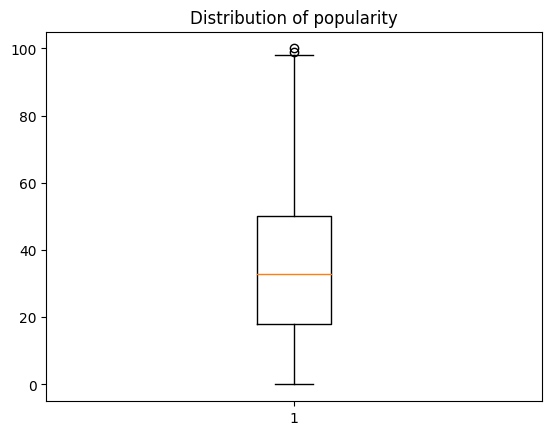

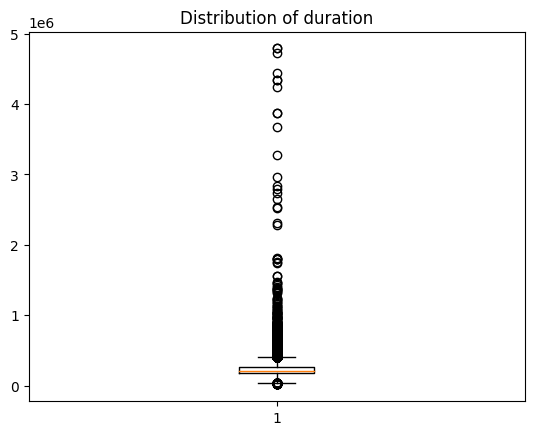

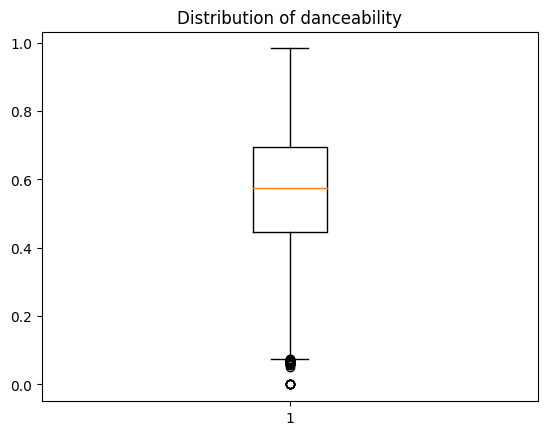

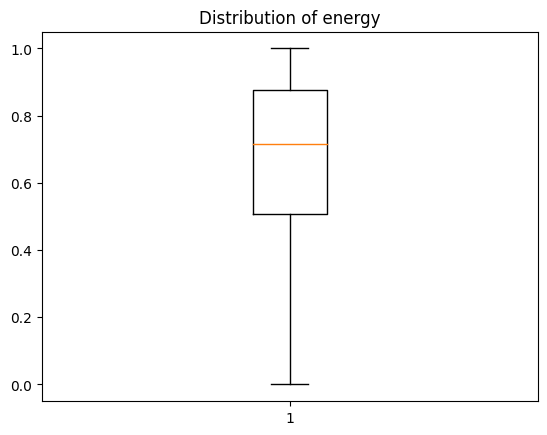

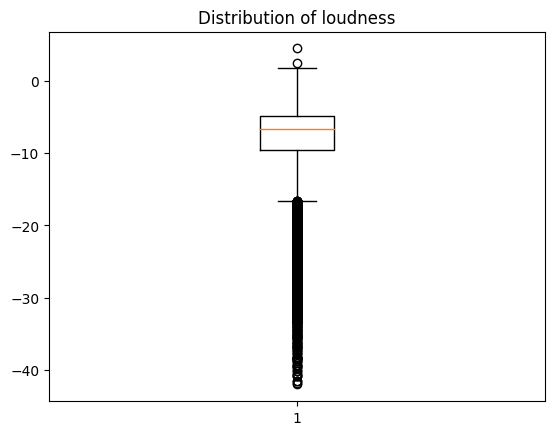

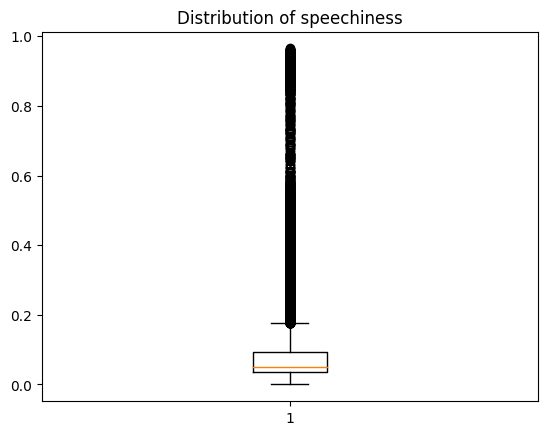

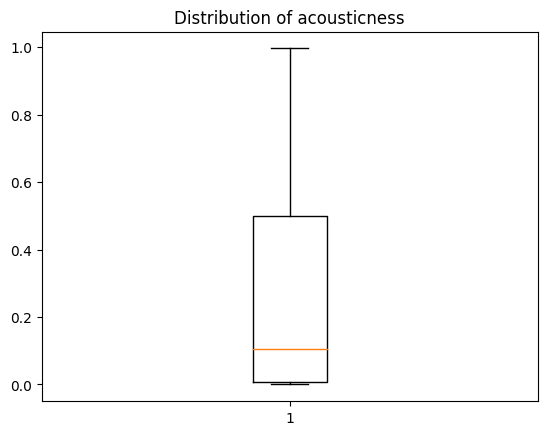

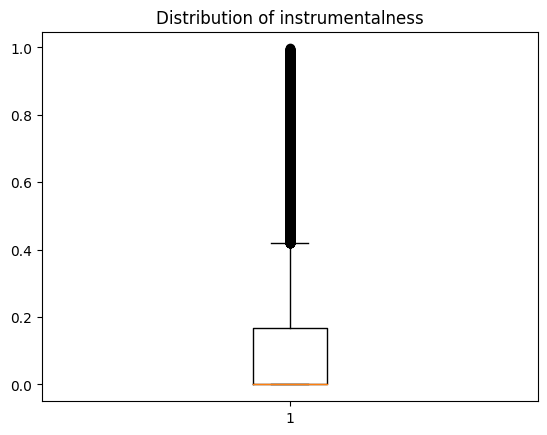

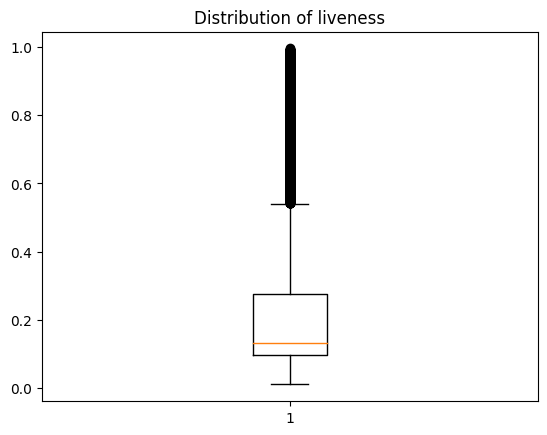

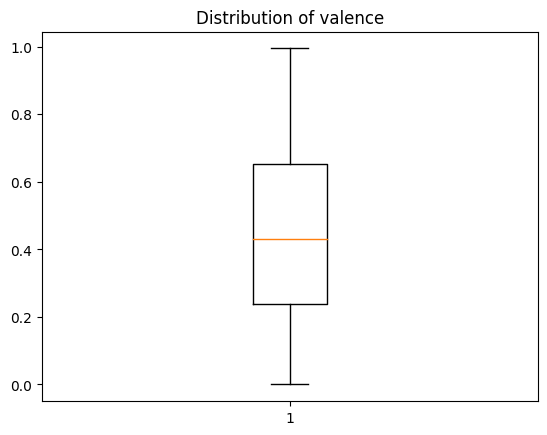

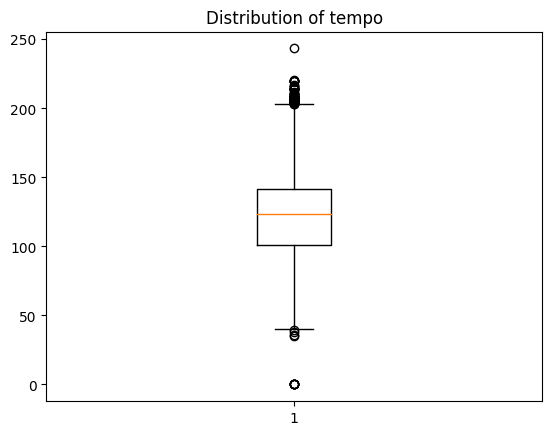

In [ ]:
for i in df_spotify52kData.columns:
  if i in ['songNumber', 'artists',	'album_name',	'track_name', 'key', 'mode', 'time_signature', 'explicit', 'track_genre']:
    continue
  plt.boxplot(df_spotify52kData[i])
  plt.title(f'Distribution of {i}')
  plt.show()

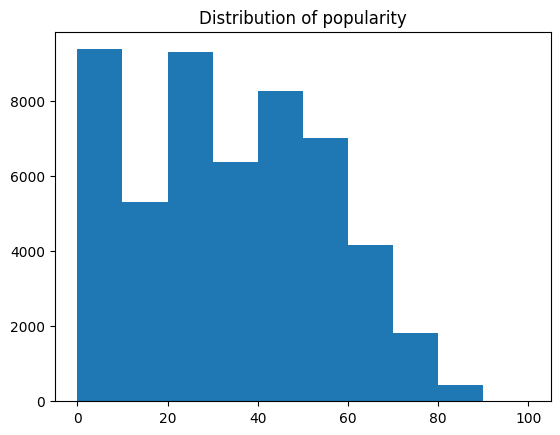

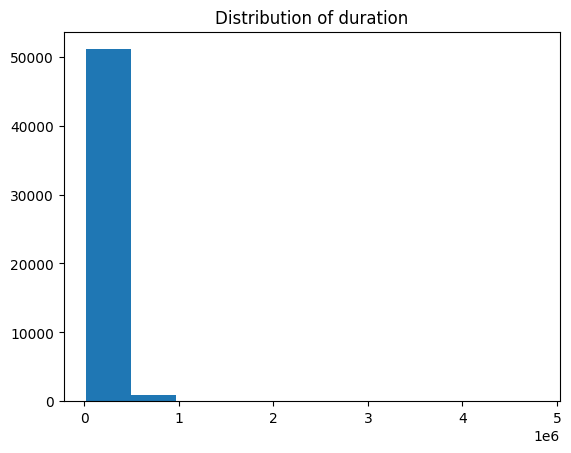

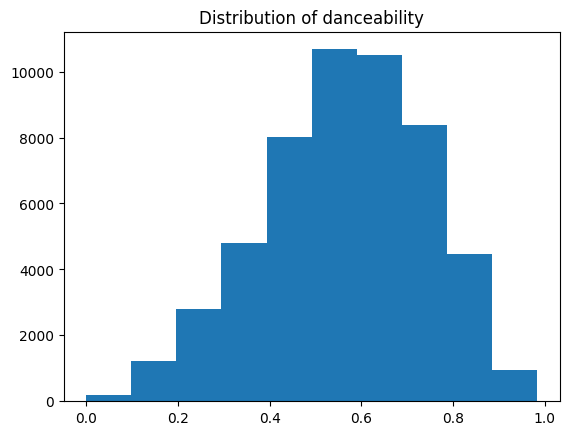

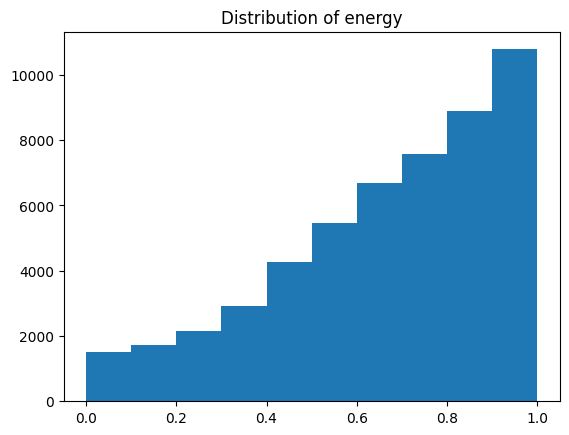

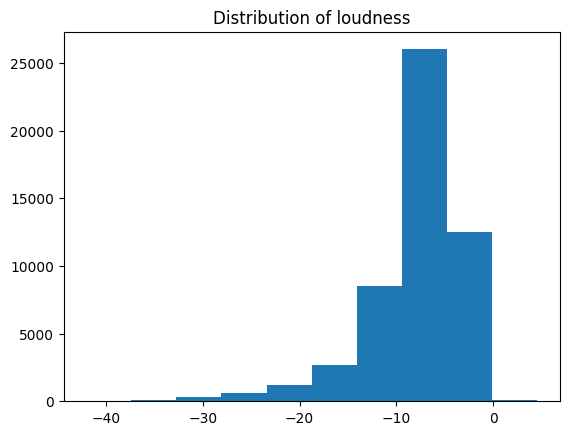

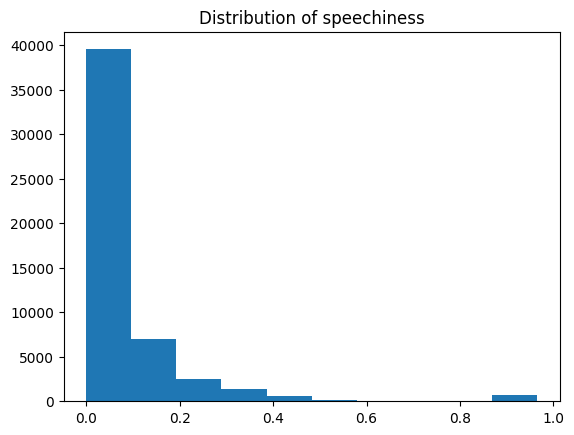

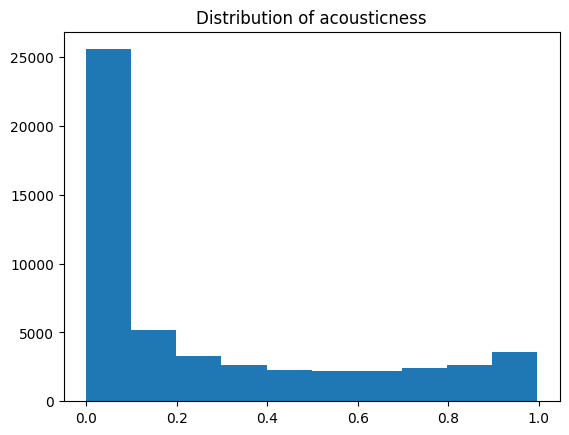

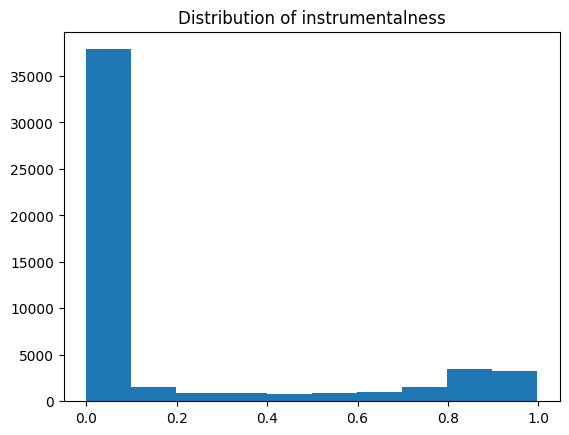

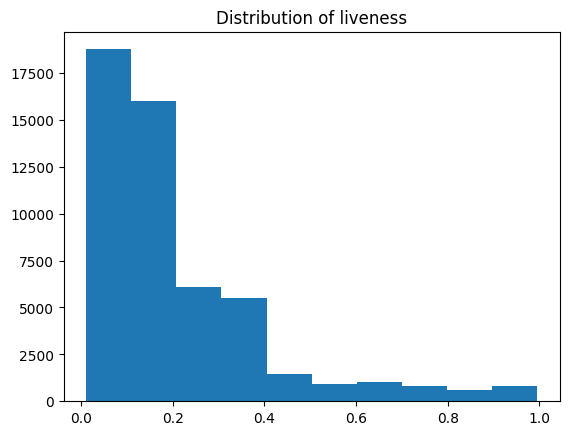

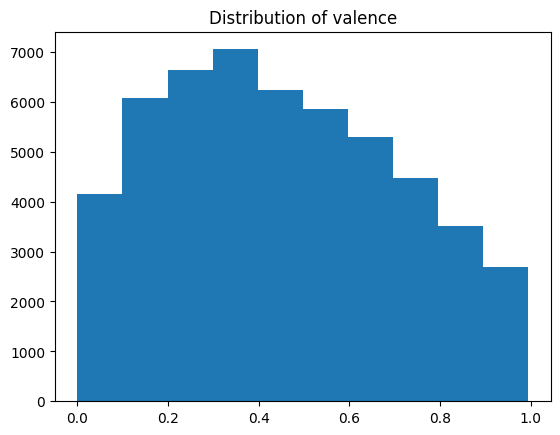

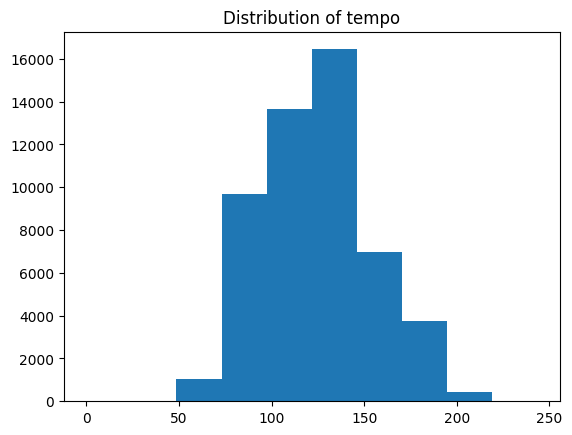

In [ ]:
for i in df_spotify52kData.columns:
  if i in ['songNumber', 'artists',	'album_name',	'track_name', 'key', 'mode', 'time_signature', 'explicit', 'track_genre']:
    continue
  plt.hist(df_spotify52kData[i])

  plt.title(f'Distribution of {i}')
  plt.show()

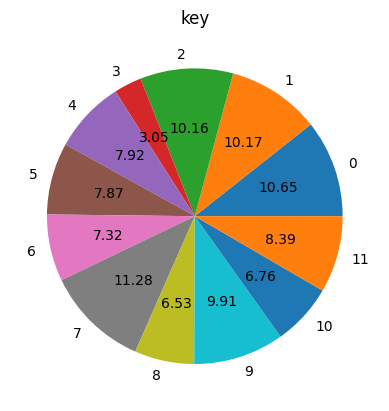

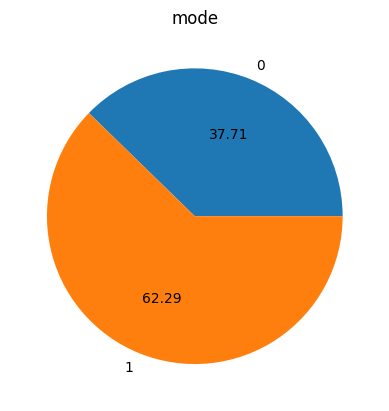

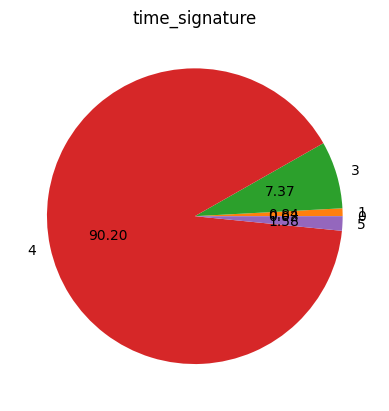

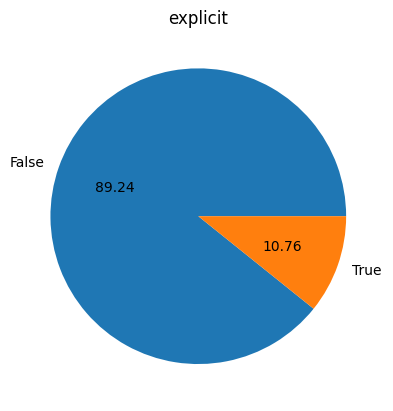

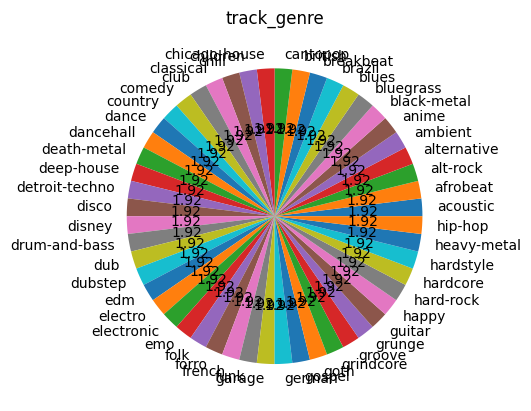

In [ ]:
for i in ['key', 'mode', 'time_signature', 'explicit', 'track_genre']:
  df_spotify52kData.groupby(i).size().plot(kind='pie', autopct='%.2f')
  plt.title(i)
  plt.show()

In [ ]:
df_spotify52kData.sort_values(by = 'duration', ascending = False)

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
10935,10935,Timo Maas,Crossing Wires 002 - Compiled And Mixed By Tim...,Crossing Wires 002 - Continuous DJ Mix,11,4789026,False,0.697,0.6320,1,-12.469,1,0.0451,0.00815,0.871,0.0998,0.151,121.055,4,breakbeat
10984,10984,Timo Maas,Crossing Wires 002 - Compiled And Mixed By Tim...,Crossing Wires 002 - Continuous DJ Mix,11,4789026,False,0.697,0.6320,1,-12.469,1,0.0451,0.00815,0.871,0.0998,0.151,121.055,4,breakbeat
24348,24348,Seth Troxler,Seth Troxler - The Lab 03,The Lab 03 - Continuous DJ Mix Part 1,8,4730302,False,0.684,0.6560,5,-11.163,0,0.0633,0.01910,0.848,0.1030,0.301,123.180,4,detroit-techno
13344,13344,Mark Farina,House of OM (DJ Mix),House of Om - Mark Farina - Continuous Mix,11,4447520,False,0.861,0.8050,11,-6.461,0,0.0711,0.00548,0.577,0.1350,0.545,129.306,4,chicago-house
13245,13245,Mark Farina,Live In Tokyo,Live In Tokyo - Continuous Mix,11,4339826,False,0.806,0.5820,1,-12.181,1,0.0874,0.00830,0.237,0.3280,0.686,128.368,4,chicago-house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16292,16292,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 13, Estrella (Live in Jap...",0,23506,False,0.379,0.2370,5,-18.265,1,0.0470,0.99300,0.887,0.1440,0.477,116.093,4,classical
11398,11398,Benjamin Britten;Steven Isserlis,October Classical Playlist,"Cello Suite No. 3, Op. 87: IX. Passacaglia (Ex...",0,22266,False,0.335,0.0593,11,-26.365,0,0.0430,0.99200,0.869,0.1160,0.195,77.266,5,british
39233,39233,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 20, Pause (Live in Japan,...",0,17826,False,0.372,0.2780,8,-16.882,1,0.0370,0.98500,0.921,0.1640,0.912,89.032,1,german
16288,16288,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 20, Pause (Live in Japan,...",0,17826,False,0.372,0.2780,8,-16.882,1,0.0370,0.98500,0.921,0.1640,0.912,89.032,1,classical


In [ ]:
nan_per_song = df_starRatings.isna().sum(axis = 0)
nan_per_song[nan_per_song == 10000]
print(f'On average, there are {10000 - nan_per_song.mean()} ratings for each song. \nThe song being rated by most have {10000 - nan_per_song.min()} ratings. \nThe least rated song have {10000 - nan_per_song.max()} raters.')

On average, there are 999.2345999999998 ratings for each song. 
The song being rated by most have 1102 ratings. 
The least rated song have 889 raters.


In [ ]:
nan_per_rater = df_starRatings.isna().sum(axis = 1)
nan_per_rater[nan_per_rater == 5000]
print(f'On average, there are {5000 - nan_per_rater.mean()} ratings for each rater. \nThe rater that rated most songs have {5000 - nan_per_rater.min()} ratings. \nThe least rated rater have {5000 - nan_per_rater.max()} ratings.')

On average, there are 499.6172999999999 ratings for each rater. 
The rater that rated most songs have 580 ratings. 
The least rated rater have 424 ratings.


# 1) Is there a relationship between song length and popularity of a song? If so, is it positive or negative?

In [ ]:
df_spotify52kData.head()

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
#1 Is there a relationship between song length and popularity of a song? If so, is it positive or negative?
song_length = df_spotify52kData['duration'].to_numpy()
popularity = df_spotify52kData['popularity'].to_numpy()

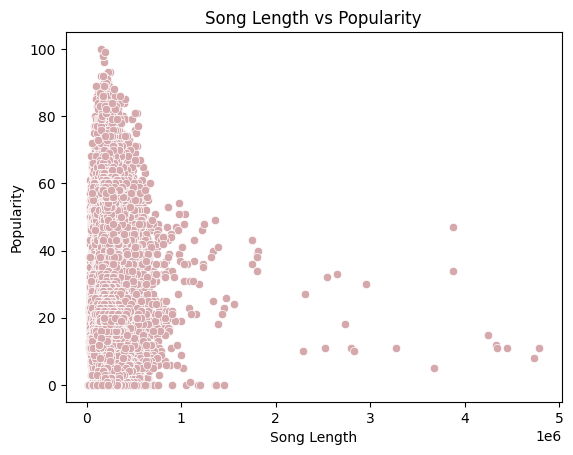

-0.05465119593637635

In [ ]:
sns.scatterplot(x=song_length, y=popularity, color = '#d5a8ac')
plt.xlabel('Song Length')
plt.ylabel('Popularity')
plt.title('Song Length vs Popularity')
plt.show()

# Calculate and print Pearson correlation coefficient
corr, _ = stats.pearsonr(song_length, popularity)
corr

# 2) Are explicitly rated songs more popular than songs that are not explicit?

In [ ]:
df_spotify52kData['popularity'].sort_values(ascending=False)

20001    100
51664     99
30003     98
20008     98
20000     96
        ... 
21140      0
21137      0
21135      0
21133      0
51999      0
Name: popularity, Length: 52000, dtype: int64

In [ ]:
#2 Are explicitly rated songs more popular than songs that are not explicit?
explicit = df_spotify52kData[df_spotify52kData['explicit'] == True]['popularity'].to_numpy()
implicit = df_spotify52kData[df_spotify52kData['explicit'] == False]['popularity'].to_numpy()
explicit_median = df_spotify52kData[df_spotify52kData['explicit'] == True]['popularity'].median()
implicit_median = df_spotify52kData[df_spotify52kData['explicit'] == False]['popularity'].median()
print('explicit_median:', explicit_median)
print('implicit_median:', implicit_median)

explicit_median: 34.0
implicit_median: 33.0


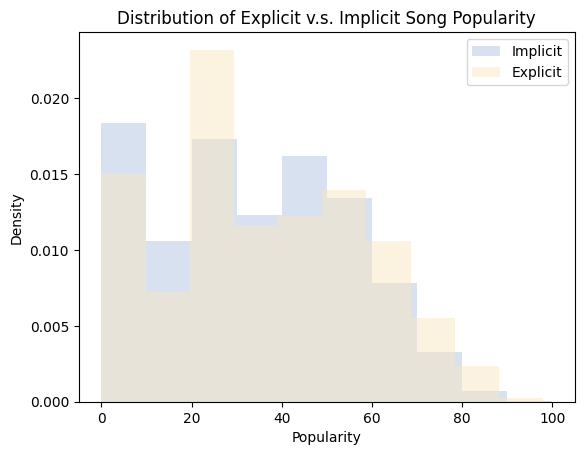

In [ ]:
plt.hist(implicit, label='Implicit', alpha = 0.5, density = True, color = '#B1C4E2')
plt.hist(explicit, label='Explicit', alpha = 0.5, density = True, color = '#F8E6C2')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.title("Distribution of Explicit v.s. Implicit Song Popularity")
plt.legend()
plt.show()

In [ ]:
#MW-U test
#t1,p1 = stats.ttest_ind(explicit, implicit, alternative='greater')
u1,p1 = stats.mannwhitneyu(explicit, implicit, alternative='greater')
u1,p1

(139361273.5, 1.5339599669557339e-19)

In [ ]:
#since p-value is less than 0.005, we have sufficient evidence to reject H0. Thus, explicit key is more popular than implicit key.

# 3) Are songs in major key more popular than songs in minor key?

In [ ]:
#3) Are songs in major key more popular than songs in minor key?
major = df_spotify52kData[df_spotify52kData['mode'] == 1]['popularity'].to_numpy()
minor = df_spotify52kData[df_spotify52kData['mode'] == 0]['popularity'].to_numpy()

print('major:', np.median(major))
print('minor:', np.median(minor))

major: 32.0
minor: 34.0


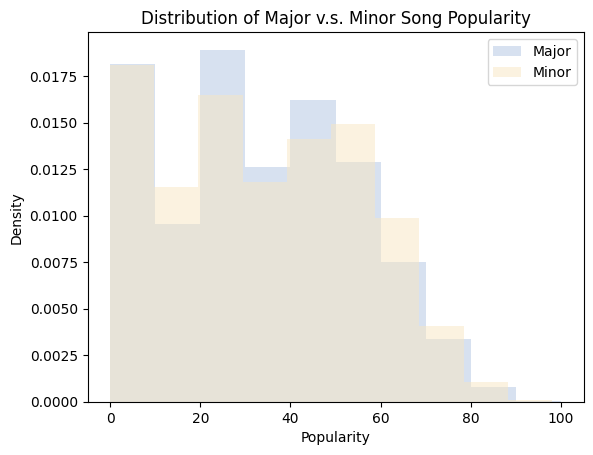

In [ ]:
plt.hist(major, label='Major', alpha = 0.5, density = True, color = '#B1C4E2')
plt.hist(minor, label='Minor', alpha = 0.5, density = True, color = '#F8E6C2')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.title("Distribution of Major v.s. Minor Song Popularity")
plt.legend()
plt.show()

In [ ]:
u2, p2 = stats.mannwhitneyu(major, minor, alternative='greater')
u2,p2

(309702373.0, 0.9999989912386331)

In [ ]:
#since p-value is more than 0.005, we dont' have sufficient evidence to reject H0. Thus, major key is not more popular than minor key.

# 4) Which of the following 10 song features: duration, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence and tempo predicts popularity best? How good is this model?

In [ ]:
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
performance={}
for feature in features:
    X = df_spotify52kData[[feature]]
    y = df_spotify52kData['popularity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    performance[feature] = {'MSE': mse, 'R2': r2}

best_feature = max(performance, key=lambda k: performance[k]['R2'])

print(f"Best feature: {best_feature}")
print(f"Performance: {performance[best_feature]}")

Best feature: instrumentalness
Performance: {'MSE': 459.29150300098627, 'R2': 0.01794330601274552}


In [ ]:
performance

{'duration': {'MSE': 465.6127269795561, 'R2': 0.0044272703757136656},
 'danceability': {'MSE': 467.40556731034803, 'R2': 0.0005938207329477807},
 'energy': {'MSE': 465.91672817550455, 'R2': 0.0037772552817905147},
 'loudness': {'MSE': 466.5715896693824, 'R2': 0.0023770310026667296},
 'speechiness': {'MSE': 466.80905945319483, 'R2': 0.0018692733165589503},
 'acousticness': {'MSE': 467.1084219619014, 'R2': 0.0012291766596795872},
 'instrumentalness': {'MSE': 459.29150300098627, 'R2': 0.01794330601274552},
 'liveness': {'MSE': 466.7120038357787, 'R2': 0.0020767975536716277},
 'valence': {'MSE': 466.8769324348206, 'R2': 0.0017241473660223328},
 'tempo': {'MSE': 467.7346401631721, 'R2': -0.00010980255599579714}}

# 5) Building a model that uses *all* of the song features mentioned in question 4, how well can you predict popularity? How much (if at all) is this model improved compared to the model in question 4). How do you account for this? What happens if you regularize your model?

In [ ]:
performance={}
X = df_spotify52kData[features]
y = df_spotify52kData['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse, 'R2:', r2)

MSE: 445.8561702178854 R2: 0.046670722935070574


In [ ]:
LassoRegression = Lasso()
alphas = np.arange (0.0001, 1, 0.0005)
param_distributions = {'alpha': alphas}
lasso_regressor = RandomizedSearchCV(estimator = LassoRegression, param_distributions = param_distributions, n_iter = 1000, scoring='r2', cv=5, n_jobs = -1)
lasso_regressor.fit(X_train,y_train)
y_pred = lasso_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
best_model = lasso_regressor.best_estimator_
print("alpha:", lasso_regressor.best_estimator_)
print("beta:", best_model.coef_)
#print("intercept:", best_model.intercept_)
print('MSE:', mse, 'R2:', r2)

alpha: Lasso(alpha=0.0016)
beta: [-7.73994482e-06  5.22554589e+00 -1.38820230e+01  6.49429131e-01
 -7.39391186e+00  6.44907715e-01 -8.96955527e+00 -2.22244562e+00
 -8.02705786e+00  8.67496474e-03]
MSE: 445.8532164051125 R2: 0.04667703877498364


# 6) When considering the 10 song features in the previous question, how many meaningful principal components can you extract? What proportion of the variance do these principal components account for? Using these principal components, how many clusters can you identify? Do these clusters reasonably correspond to the genre labels in column 20 of the data?

eigenvalues:  [2.73393354 1.61739086 1.38460532 0.97960682 0.87522623 0.8148464
 0.67828163 0.4715811  0.31313969 0.13158071]


Text(0, 0.5, 'Explained Variance')

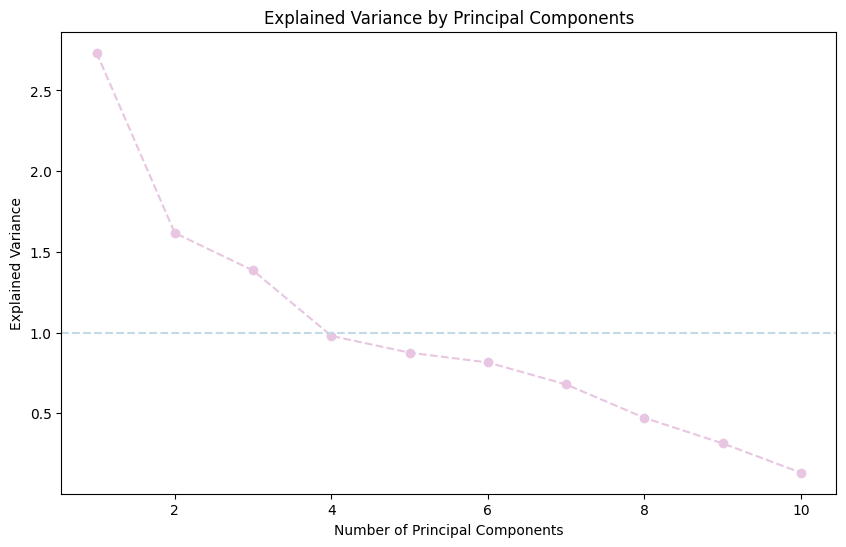

In [ ]:
X = df_spotify52kData[features]
# standardixe X
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(X)
# create PCA
pca = PCA()
pca.fit_transform(df_features_scaled)
# find the variance
explained_variance = pca.explained_variance_
print('eigenvalues: ',explained_variance)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color = '#e8c6e1')
plt.axhline(y=1, color='#c3dae6', linestyle='--', label='y = 1')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')

In [ ]:
# explained variance proportion
sum(explained_variance[:3])/sum(explained_variance)

0.5735819422797213

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Silhouette Score by Number of Cluster')

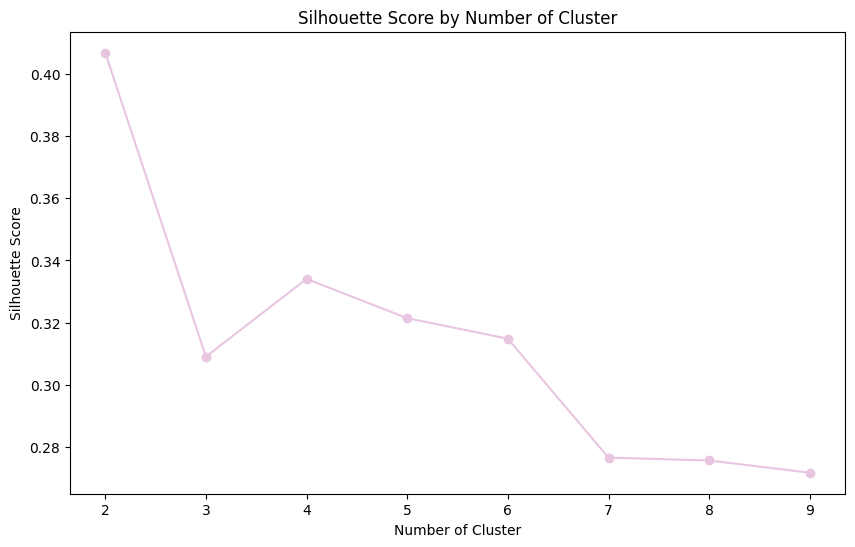

In [ ]:
pca_3 = PCA(n_components=3)
df_features_pca_3 = pca_3.fit_transform(df_features_scaled)
range_n_clusters = range(2,10)
silhouette_avg_scores = []

for k in range_n_clusters:
  clusterer = KMeans(n_clusters=k, random_state=random_seed)
  cluster_labels = clusterer.fit_predict(df_features_pca_3)
  silhouette_avg = silhouette_score(df_features_pca_3, cluster_labels)
  silhouette_avg_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o', color = '#e8c6e1')
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Number of Cluster')

In [ ]:
# numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
# Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# # Compute kMeans:
# plt.figure(figsize=(16, 8))
# for ii in range(2, 5): # Loop through each cluster (from 2 to 10!)
#     kMeans = KMeans(n_clusters = int(ii)).fit(df_features_pca_3) # compute kmeans using scikit
#     cluster_labels = kMeans.labels_ # vector of cluster IDs that the row belongs to
#     cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
#     s = silhouette_samples(df_features_pca_3,cluster_labels) # compute the mean silhouette coefficient of all samples
#     Q[ii-2] = sum(s) # take the sum

# plt.plot(np.linspace(2,10,9),Q)

In [ ]:
clusterer = KMeans(n_clusters=2, random_state=random_seed)
cluster_labels = clusterer.fit_predict(df_features_pca_3)
# get predicted labels
df_spotify52kData['cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Function to calculate cluster ratios for a given cluster label column
def calculate_cluster_ratios(data, genre_col, cluster_col):
    # Grouping by genre and cluster label, then counting occurrences
    genre_cluster_counts = data.groupby([genre_col, cluster_col]).size().reset_index(name='count')

    # Calculating the total number of songs per genre
    genre_totals = data.groupby(genre_col).size().reset_index(name='total')

    # Merging the counts with the totals
    merged_data = pd.merge(genre_cluster_counts, genre_totals, on=genre_col)

    # Calculating the ratio for each cluster within each genre
    merged_data['ratio'] = merged_data['count'] / merged_data['total']

    return merged_data.sort_values(by=[genre_col, cluster_col])

# Calculating ratios for both cluster label columns
cluster_ratios_1 = calculate_cluster_ratios(df_spotify52kData, 'track_genre', 'cluster')

cluster_ratios_1.head()
cluster_0 = cluster_ratios_1[cluster_ratios_1['cluster'] == 0]
cluster_1 = cluster_ratios_1[cluster_ratios_1['cluster'] == 1]
cluster_ratio = pd.merge(cluster_0,cluster_1, on = 'track_genre', how = 'inner').sort_values(by = 'ratio_x').rename(columns = {"count_x": "count_0", "ratio_x": "ratio_0", "count_y": "count_1", "ratio_y": "ratio_1"}).drop(columns = ["cluster_x", "total_x", "cluster_y", "total_y", "count_0", "count_1"])
pd.concat([cluster_ratio.head(), cluster_ratio.tail()]).reset_index().drop(columns = 'index')

,track_genre,ratio_0,ratio_1
0,classical,0.069,0.931
1,ambient,0.101,0.899
2,guitar,0.215,0.785
3,disney,0.227,0.773
4,acoustic,0.441,0.559
5,hardcore,0.991,0.009
6,death-metal,0.992,0.008
7,happy,0.994,0.006
8,drum-and-bass,0.996,0.004
9,edm,0.997,0.003


In [ ]:
cluster_ratio

,track_genre,ratio_0,ratio_1
16,classical,0.069,0.931
4,ambient,0.101,0.899
45,guitar,0.215,0.785
26,disney,0.227,0.773
0,acoustic,0.441,0.559
15,chill,0.464,0.536
12,cantopop,0.499,0.501
11,british,0.555,0.445
7,bluegrass,0.606,0.394
34,folk,0.615,0.385


In [ ]:
# Song genres in the cluster 1 has stronger beat

# 7) Can you predict whether a song is in major or minor key from valence using logistic regression or a support vector machine? If so, how good is this prediction? If not, is there a better one?

Text(0, 0.5, 'Mode')

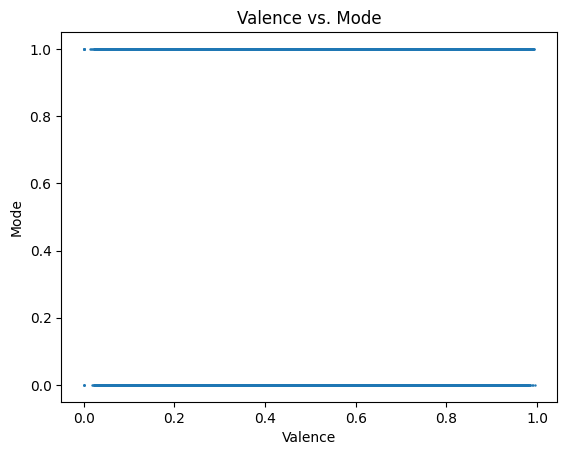

In [ ]:
plt.scatter(df_spotify52kData['valence'],df_spotify52kData['mode'], s= 0.5)
plt.title('Valence vs. Mode')
plt.xlabel('Valence')
plt.ylabel('Mode')

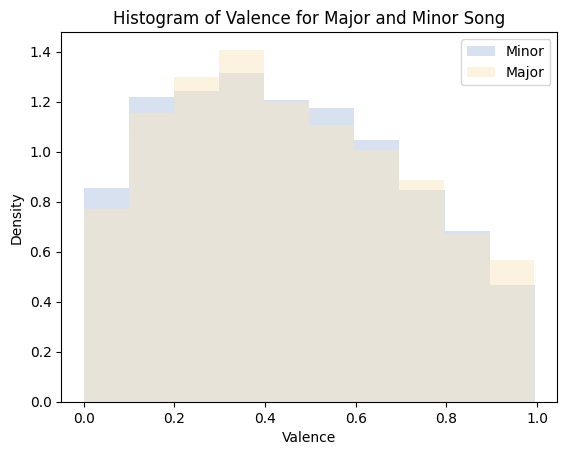

In [ ]:
plt.hist(df_spotify52kData[df_spotify52kData['mode'] == 0]['valence'], alpha = 0.5, label = "Minor", density = True, color = '#B1C4E2')
plt.hist(df_spotify52kData[df_spotify52kData['mode'] == 1]['valence'], alpha = 0.5, label = "Major", density = True, color = '#F8E6C2')
plt.title('Histogram of Valence for Major and Minor Song')
plt.xlabel('Valence')
plt.ylabel('Density')
plt.legend()

In [ ]:
X = df_spotify52kData[['valence']]
y = df_spotify52kData['mode']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

Logistic Regression Accuracy: 0.6221794871794872
SVM Accuracy: 0.6221794871794872


==================SVM==================
Specificity: 0.0
Precision: 0.6221794871794872
Sensitivity: 1.0
Prevalence: 0.6221794871794872


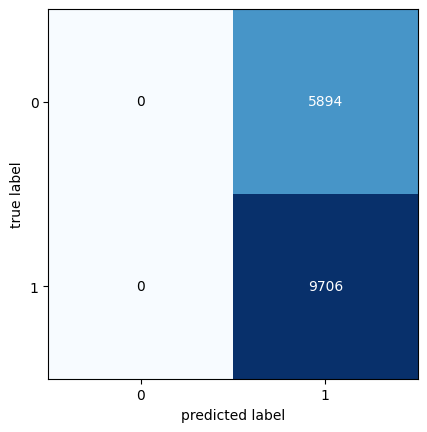

==================Logistic Regression==================
Specificity: 0.0
Precision: 0.6221794871794872
Sensitivity: 1.0
Prevalence: 0.6221794871794872


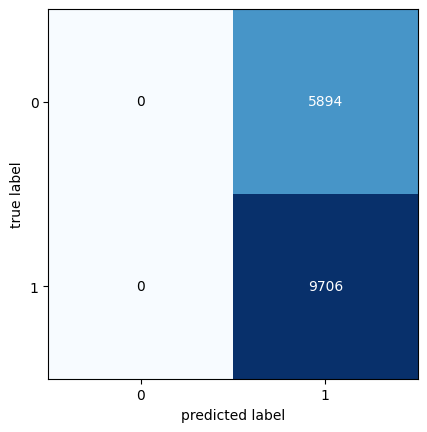

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, svm_pred).ravel()
print("==================SVM==================")
print("Specificity:", tn/(tn+fp))
print("Precision:", tp/(tp+fp))
print("Sensitivity:", tp/(tp+fn))
print('Prevalence:', (tp+fn)/(tn+fp+fn+tp))
plot_confusion_matrix(conf_mat=np.array([[tn,fp],[fn,tp]]))
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test, log_reg_pred).ravel()
print("==================Logistic Regression==================")
print("Specificity:", tn/(tn+fp))
print("Precision:", tp/(tp+fp))
print("Sensitivity:", tp/(tp+fn))
print('Prevalence:', (tp+fn)/(tn+fp+fn+tp))
plot_confusion_matrix(conf_mat=np.array([[tn,fp],[fn,tp]]))
plt.show()

# 8) Can you predict genre by using the 10 song features from question 4 directly or the principal components you extracted in question 6 with a neural network? How well does this work?

In [ ]:
X_scaled = df_features_scaled
y = df_spotify52kData['track_genre']
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=random_seed)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100}%")

Epoch 1/100
1138/1138 [==============================] - 3s 2ms/step - loss: 3.1419 - accuracy: 0.1671
Epoch 2/100
1138/1138 [==============================] - 2s 2ms/step - loss: 2.8130 - accuracy: 0.2285
Epoch 3/100
1138/1138 [==============================] - 3s 3ms/step - loss: 2.7594 - accuracy: 0.2418
Epoch 4/100
1138/1138 [==============================] - 3s 3ms/step - loss: 2.7248 - accuracy: 0.2491
Epoch 5/100
1138/1138 [==============================] - 2s 2ms/step - loss: 2.6981 - accuracy: 0.2577
Epoch 6/100
1138/1138 [==============================] - 2s 2ms/step - loss: 2.6766 - accuracy: 0.2609
Epoch 7/100
1138/1138 [==============================] - 2s 2ms/step - loss: 2.6594 - accuracy: 0.2679
Epoch 8/100
1138/1138 [==============================] - 2s 2ms/step - loss: 2.6440 - accuracy: 0.2699
Epoch 9/100
1138/1138 [==============================] - 4s 3ms/step - loss: 2.6319 - accuracy: 0.2741
Epoch 10/100
1138/1138 [==============================] - 2s 2ms/step - l

# 9) In recommender systems, the popularity based model is an important baseline. We have a two part question in this regard:  
# a) Is there a relationship between popularity and average star rating for the 5k songs we have explicit feedback for?  


In [ ]:
avg_star_rating_5k = df_starRatings.mean(axis = 0)
popularity_5k = df_spotify52kData['popularity'][:5000]

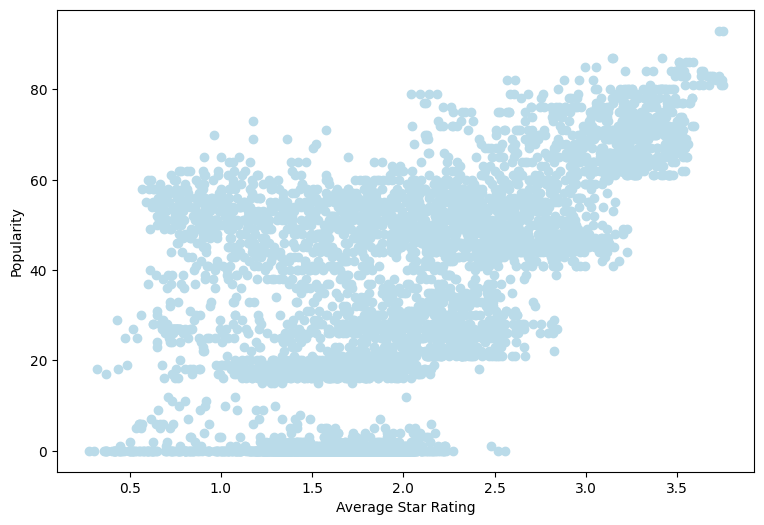

In [ ]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(avg_star_rating_5k, popularity_5k, color = '#badbe9')
plt.xlabel('Average Star Rating')
plt.ylabel('Popularity')
plt.show()

In [ ]:
stats.pearsonr(avg_star_rating_5k, popularity_5k)

PearsonRResult(statistic=0.5693914205195063, pvalue=0.0)

Yes, the correlation between average star rating and popularity is 0.56. There is moderately positive correlation between Popularity and Average Star Rating for each song. Also from the scatterplot, as average star rating increases, the popularity also tends to increase.

# b) Which 10 songs are in the “greatest hits” (out of the 5k songs), on the basis of the popularity based model?

In [ ]:
greatest_hit = df_spotify52kData.iloc[avg_star_rating_5k.sort_values(ascending = False)[:10].index]
greatest_hit[['songNumber', 'artists', 'album_name', 'track_name', 'popularity']]

,songNumber,artists,album_name,track_name,popularity
3877,3877,The Offspring,"Rise And Fall, Rage And Grace","You're Gonna Go Far, Kid",81
3003,3003,The Neighbourhood,I Love You.,Sweater Weather,93
2260,2260,Red Hot Chili Peppers,By the Way (Deluxe Edition),Can't Stop,82
2562,2562,The Offspring,"Rise And Fall, Rage And Grace","You're Gonna Go Far, Kid",81
3216,3216,Red Hot Chili Peppers,Californication (Deluxe Edition),Californication,82
2105,2105,Red Hot Chili Peppers,Californication (Deluxe Edition),Californication,82
2003,2003,The Neighbourhood,I Love You.,Sweater Weather,93
2011,2011,WALK THE MOON,TALKING IS HARD,Shut Up and Dance,83
3464,3464,Red Hot Chili Peppers,By the Way (Deluxe Edition),Can't Stop,82
3253,3253,Gorillaz;Tame Impala;Bootie Brown,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),82


# 10) You want to create a “personal mixtape” for all 10k users we have explicit feedback for. This mixtape contains individualized recommendations as to which 10 songs (out of the 5k) a given user will enjoy most. How do these recommendations compare to the “greatest hits” from the previous question and how good is your recommender system in making recommendations?

In [ ]:
# Handle missing data in ratings
imputed_ratings = df_starRatings.copy()
column_means = df_starRatings.mean(axis=0)
row_means = df_starRatings.mean(axis=1)
for column in df_starRatings.columns:
    for index, value in df_starRatings[column].items():
        if pd.isnull(value):
            # Impute missing value as (column mean + row mean) / 2
            imputed_value = (column_means[column] + row_means[index]) / 2
            imputed_ratings.at[index, column] = imputed_value
ratings_filled = imputed_ratings.to_numpy()

In [ ]:
U, S, Vt = svds(ratings_filled, k=50)
S = np.diag(S)

In [ ]:
def hybrid_recommendation(user_id, U, S, Vt, df_starRatings, num_recommendations=10):

    # predicted user ratings
    user_ratings = np.dot(np.dot(U[user_id], S), Vt)
    # order ratings
    top_ratings_indices = user_ratings.argsort()[::-1]

    # find songs which user haven't rated songs yet
    user_unrated_songs = np.isnan(df_starRatings.iloc[user_id])
    user_unrated_songs = user_unrated_songs.index[user_unrated_songs].tolist()

    top_unrated_indices = [i for i in top_ratings_indices if i in user_unrated_songs][:num_recommendations]
    recommended_unrated_songs = df_spotify52kData.iloc[top_unrated_indices]['album_name']

    top_rated_indices = [i for i in top_ratings_indices if i not in user_unrated_songs][:num_recommendations]
    recommended_rated_songs = df_spotify52kData.iloc[top_rated_indices]['album_name']
    return recommended_unrated_songs, recommended_rated_songs, top_rated_indices

In [ ]:
def avg_P(top_K, y_pred, y_act):
    correct_pred = 0
    output = 0
    for i in range(top_K):
        if y_pred[i] == y_act[i]:
            correct_pred += 1
            output += correct_pred/(i+1)
    return 1/top_K * output

# compare precision for predicted v.s. actual recommended item
def precision_k(k, y_pred, y_act):
    precision = 0
    for i in range(k):
        if y_pred[i] in y_act:
            precision += 1
    return precision / k

In [ ]:
random_samples = np.random.choice(10000, 500, replace = False)
ap_personalized = []
ap_poopularity = []
for i in tqdm(random_samples):
    user_actual =  list(imputed_ratings.iloc[i].argsort()[::-1][:10])
    ap_personalized.append(precision_k(10, list(hybrid_recommendation(i, U, S, Vt, df_starRatings)[2]), user_actual))
    ap_poopularity.append(precision_k(10, list(greatest_hit['songNumber']), user_actual))

100%|██████████| 500/500 [10:49<00:00,  1.30s/it]


In [ ]:
print('average of Precision @10 of personalized recommendation', sum(ap_personalized) / len(ap_personalized))
print('average of Precision @10 of popularity based recommendation', sum(ap_poopularity) / len(ap_poopularity))

average of Precision @10 of personalized recommendation 0.09640000000000032
average of Precision @10 of popularity based recommendation 0.011199999999999993


In [ ]:
ap_personalized = []
ap_poopularity = []
for i in tqdm(range(5000)):
  # actual top 10 rated songs for each user, order by rating in descending order
    user_actual =  list(imputed_ratings.iloc[i].argsort()[::-1][:10])
    ap_personalized.append(precision_k(10, list(hybrid_recommendation(i, U, S, Vt, df_starRatings)[2]), user_actual))
    ap_poopularity.append(precision_k(10, list(greatest_hit['songNumber']), user_actual))

 27%|██▋       | 1341/5000 [30:34<1:23:24,  1.37s/it]


KeyboardInterrupt: ignored

In [ ]:
print('average of Precision @10 of personalized recommendation', sum(ap_personalized) / len(ap_personalized))
print('average of Precision @10 of popularity based recommendation', sum(ap_poopularity) / len(ap_poopularity))

# Extra credit: Tell us something interesting about this dataset that is not trivial and not already part of an answer (implied or explicitly) to these enumerated questions [Suggestion: Do something with the number of beats per measure, something with the key, or something with the song or album titles]

In [ ]:
df_songs = df_spotify52kData.iloc[:5000]
df_songs = pd.concat([df_songs, df_starRatings.mean(axis = 0)], axis = 1)
df_songs.rename(columns = {0: 'avg_rating'},inplace=True)
df_songs

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster,avg_rating
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.6760,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0,3.196939
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.4200,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1,1.361029
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.4380,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,1,2.186377
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.2660,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1,1.576998
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.6180,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,1,3.038835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,Ludovico Einaudi,Elements (Deluxe),Drop,49,300293,False,0.4650,0.0342,2,...,0.0401,0.9920,0.939000,0.1030,0.0590,152.054,4,ambient,1,0.833843
4996,4996,Air,Moon Safari,Kelly Watch the Stars,55,226293,False,0.5160,0.7430,2,...,0.0292,0.2820,0.637000,0.1110,0.2260,109.837,4,ambient,0,2.368473
4997,4997,Ludovico Einaudi,Islands - Essential Einaudi,Passagio,50,357773,False,0.2220,0.0200,9,...,0.0464,0.9950,0.948000,0.0945,0.1190,85.860,4,ambient,1,0.914201
4998,4998,Liquid Mind,Liquid Mind II: Slow World,Blue Seven,24,760053,False,0.0576,0.1690,10,...,0.0484,0.9030,0.966000,0.1170,0.0310,50.838,4,ambient,1,0.890088


In [ ]:
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
performance={}
for feature in features:
    X = df_songs[[feature]]
    y = df_songs['avg_rating']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    performance[feature] = {'MSE': mse, 'R2': r2}

best_feature = max(performance, key=lambda k: performance[k]['R2'])

print(f"Best feature: {best_feature}")
print(f"Performance: {performance[best_feature]}")

Best feature: loudness
Performance: {'MSE': 0.28735200000419514, 'R2': 0.40874632997617777}


In [ ]:
performance

{'duration': {'MSE': 0.488233143371764, 'R2': -0.0045854486539438355},
 'danceability': {'MSE': 0.46251901742172946, 'R2': 0.04832377536116916},
 'energy': {'MSE': 0.3642966417307634, 'R2': 0.25042551853641937},
 'loudness': {'MSE': 0.28735200000419514, 'R2': 0.40874632997617777},
 'speechiness': {'MSE': 0.4863389687681119, 'R2': -0.0006880068889347779},
 'acousticness': {'MSE': 0.3909661232318758, 'R2': 0.1955505609410837},
 'instrumentalness': {'MSE': 0.3913727668846824, 'R2': 0.19471385351566006},
 'liveness': {'MSE': 0.4786937080469471, 'R2': 0.015042833542353806},
 'valence': {'MSE': 0.4703507078583375, 'R2': 0.03220933831856165},
 'tempo': {'MSE': 0.4776615779929706, 'R2': 0.01716653785743283}}